# 확률적 경사 하강법

# 확률적 경사하강법 (SGD: Stochastic Gradient Descent)
* 머신러닝 모델에 사용하는 가중치, 절편의 값을 최적의 성능을 내기위해 검색하는 방법

## 손실함수
* 모델의 정확도를 평가하는 함수

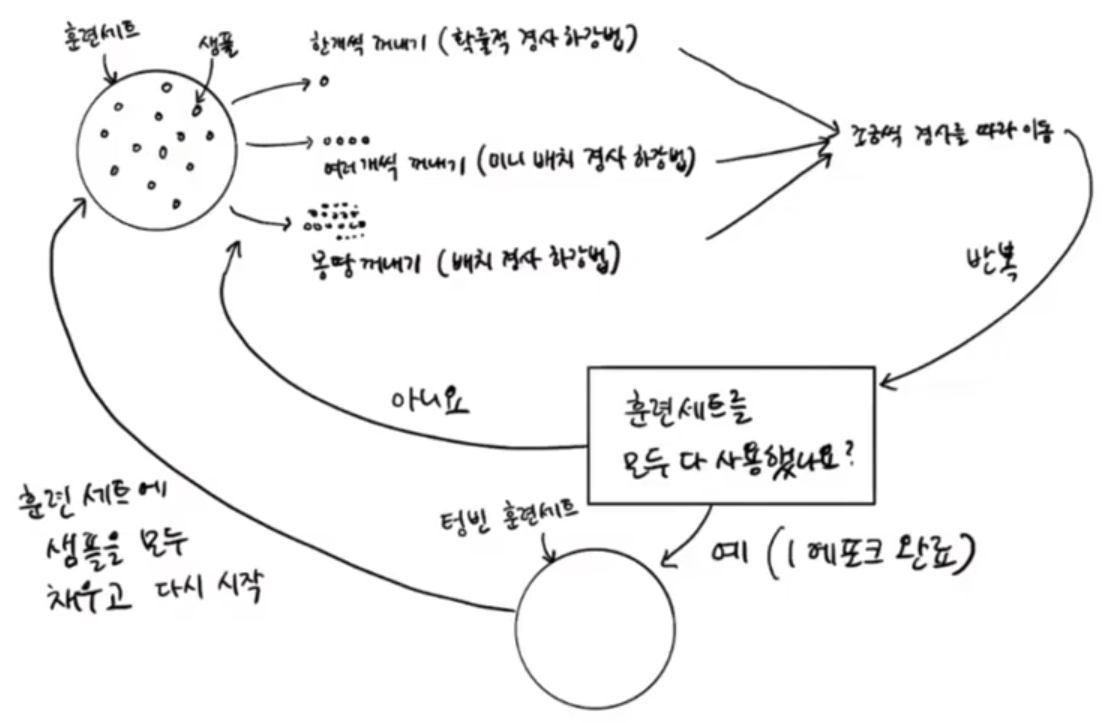

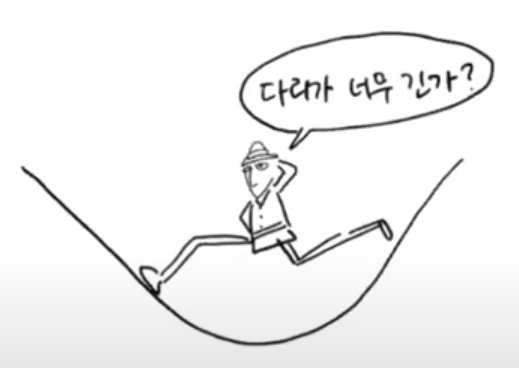

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
# sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.773109243697479
0.775


#### 과소 적합된 결과를 향상시키기 위해 기존의 가중치, 편향을 유지하고 새로운 데이터를 학습시켜 가중치, 편향을 업데이트

In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [8]:
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [9]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

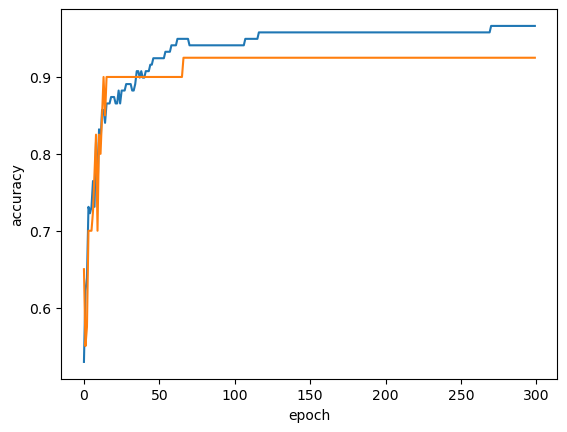

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
